In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve , roc_auc_score, auc
from sklearn.model_selection import train_test_split

In [60]:
# generate 2 class dataset
x,y= make_classification(n_samples=1000 , n_classes=2 , random_state=42)


In [61]:
y

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [62]:
x_train, x_test , y_train , y_test= train_test_split(x,y,test_size=0.3 , random_state=33)

In [63]:
 # generate a no skill prediction (majority class)
# create a dummy model with default output as zero
dummy_model_prob=[0 for _ in range(len(y_test))]


In [64]:
model=LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [65]:
# prediction based on probablility
model_prob= model.predict_proba(x_test)

In [66]:
model_prob

array([[7.09173622e-01, 2.90826378e-01],
       [6.92571843e-01, 3.07428157e-01],
       [8.27236470e-01, 1.72763530e-01],
       [8.57056768e-01, 1.42943232e-01],
       [8.17711807e-01, 1.82288193e-01],
       [6.47180090e-01, 3.52819910e-01],
       [2.43921818e-02, 9.75607818e-01],
       [2.71415486e-01, 7.28584514e-01],
       [7.53147958e-01, 2.46852042e-01],
       [9.73378831e-01, 2.66211686e-02],
       [3.93595822e-01, 6.06404178e-01],
       [7.88637271e-02, 9.21136273e-01],
       [4.70560781e-01, 5.29439219e-01],
       [7.79754401e-01, 2.20245599e-01],
       [7.40845703e-02, 9.25915430e-01],
       [9.15690224e-01, 8.43097763e-02],
       [7.60928774e-01, 2.39071226e-01],
       [8.83481044e-01, 1.16518956e-01],
       [1.01686022e-01, 8.98313978e-01],
       [9.32797265e-01, 6.72027352e-02],
       [7.67576519e-01, 2.32423481e-01],
       [8.84938056e-02, 9.11506194e-01],
       [8.83167803e-01, 1.16832197e-01],
       [5.41995963e-01, 4.58004037e-01],
       [6.063271

In [67]:
# lets focus on positive outcome
model_prob=model_prob[:,1]

In [68]:
dummy_model_prob= dummy_model

# ROC (Receiver Operating Characteristic) Curve
It’s a graph used to evaluate how good a classification model is, especially for binary classification (e.g., yes/no, spam/not spam).

The ROC curve shows the trade-off between:

True Positive Rate (TPR) – how many actual positives the model correctly identified.

False Positive Rate (FPR) – how many actual negatives were wrongly identified as positive.

Imagine this:

You are a doctor trying to detect a disease.

If you increase sensitivity, you catch more sick people (TPR goes up) but you might also wrongly say healthy people are sick (FPR goes up).

# Sensitivity, recall , hit rate or True positive rate
TPR= TP/(TP+TN) = 1-FPR 

# AUC (Area Under the Curve)
This is a number between 0 and 1 that tells how good the model is overall.

AUC = 1 means perfect model – it can perfectly distinguish between the classes.

AUC = 0.5 means no better than random guessing.

Higher AUC = better model.

Example Analogy
Imagine you’re a security guard checking people entering a building. Some are criminals (positives), some are not (negatives).

The ROC curve is like plotting how many real criminals you catch vs. how many innocent people you mistakenly stop as you make your checks stricter or looser.

The AUC is your overall performance score as a guard. Higher score = better at telling criminals from innocent people.



In [69]:
# calculate the scores
dummy_model_auc=roc_auc_score(y_test , dummy_model_prob)
model_auc= roc_auc_score(y_test, model_prob)
print("dummy model score :", dummy_model_auc)
print("logistic model score :", model_auc)

dummy model score : 0.5
logistic model score : 0.9240140500644703


In [75]:
# calulate roc curves
dummy_fpr , dummy_tpr ,_= roc_curve(y_test , dummy_model_prob)
model_fpr , model_tpr ,threshold= roc_curve(y_test , model_prob)


# What is a Threshold in ROC Curve?
In binary classification, a threshold is the cut-off value used to decide whether a predicted probability should be classified as:

Class 1 (positive) if probability ≥ threshold

Class 0 (negative) if probability < threshold

📦 Example:
Imagine your model predicts this for a person having a disease:
Predicted probability = 0.70
If your threshold is 0.5, then:

0.70 ≥ 0.5 → Predict "Has disease" (Class 1)

If your threshold is 0.8, then:

0.70 < 0.8 → Predict "No disease" (Class 0)

Lower threshold → more predictions as positive → higher TPR but also higher FPR

Higher threshold → fewer predictions as positive → lower FPR but also lower TPR

In [76]:
model_fpr

array([0.        , 0.        , 0.        , 0.00680272, 0.00680272,
       0.01360544, 0.01360544, 0.02040816, 0.02040816, 0.02721088,
       0.02721088, 0.03401361, 0.03401361, 0.04081633, 0.04081633,
       0.05442177, 0.05442177, 0.06122449, 0.06122449, 0.06802721,
       0.06802721, 0.0952381 , 0.0952381 , 0.10204082, 0.10204082,
       0.12244898, 0.12244898, 0.13605442, 0.13605442, 0.14285714,
       0.14285714, 0.14965986, 0.14965986, 0.23809524, 0.23809524,
       0.26530612, 0.26530612, 0.29251701, 0.29251701, 0.29931973,
       0.29931973, 0.30612245, 0.30612245, 0.31292517, 0.31292517,
       0.36734694, 0.36734694, 0.57823129, 0.57823129, 0.59863946,
       0.59863946, 0.62585034, 0.62585034, 0.65986395, 0.65986395,
       0.86394558, 0.86394558, 0.95918367, 0.95918367, 1.        ])

In [77]:
model_tpr

array([0.        , 0.00653595, 0.20261438, 0.20261438, 0.29411765,
       0.29411765, 0.30718954, 0.30718954, 0.49019608, 0.49019608,
       0.52287582, 0.52287582, 0.54901961, 0.54901961, 0.7124183 ,
       0.7124183 , 0.77124183, 0.77124183, 0.77777778, 0.77777778,
       0.80392157, 0.80392157, 0.82352941, 0.82352941, 0.8627451 ,
       0.8627451 , 0.87581699, 0.87581699, 0.88888889, 0.88888889,
       0.90196078, 0.90196078, 0.90849673, 0.90849673, 0.91503268,
       0.91503268, 0.92156863, 0.92156863, 0.92810458, 0.92810458,
       0.93464052, 0.93464052, 0.94117647, 0.94117647, 0.94771242,
       0.94771242, 0.95424837, 0.95424837, 0.96078431, 0.96078431,
       0.97385621, 0.97385621, 0.98039216, 0.98039216, 0.9869281 ,
       0.9869281 , 0.99346405, 0.99346405, 1.        , 1.        ])

In [78]:
threshold

array([           inf, 9.99827775e-01, 9.77790448e-01, 9.77350250e-01,
       9.54058407e-01, 9.49689568e-01, 9.45242528e-01, 9.45185237e-01,
       8.94077549e-01, 8.94004033e-01, 8.59359297e-01, 8.38161212e-01,
       8.28055373e-01, 8.27539290e-01, 6.60005106e-01, 6.48121422e-01,
       5.80550866e-01, 5.45028349e-01, 5.36273272e-01, 5.29439219e-01,
       5.01292372e-01, 4.73713383e-01, 4.67442061e-01, 4.61971066e-01,
       4.22328914e-01, 4.05298650e-01, 4.02983470e-01, 3.97110535e-01,
       3.94627688e-01, 3.93672851e-01, 3.90539348e-01, 3.82461267e-01,
       3.73382016e-01, 2.54738009e-01, 2.50659645e-01, 2.32423481e-01,
       2.24228663e-01, 2.18093401e-01, 2.15314012e-01, 2.10917772e-01,
       2.06959275e-01, 2.05436767e-01, 2.04706572e-01, 1.99828977e-01,
       1.95938550e-01, 1.68735361e-01, 1.62457078e-01, 8.30603468e-02,
       8.25339747e-02, 7.68741108e-02, 7.64825527e-02, 7.31469725e-02,
       7.18172154e-02, 6.72027352e-02, 6.71599423e-02, 2.66211686e-02,
      

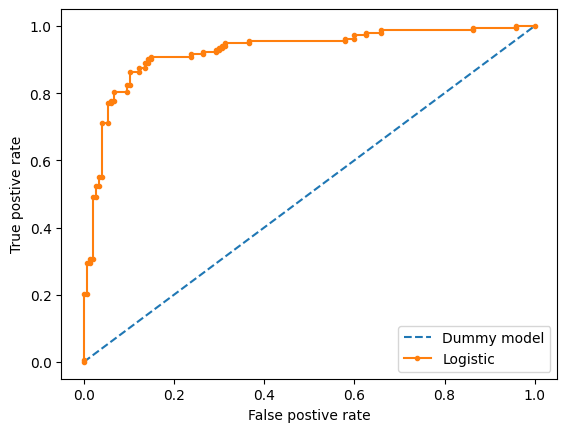

In [74]:
#plot the roc curve
plt.plot(dummy_fpr , dummy_tpr , linestyle='--' , label='Dummy model')
plt.plot(model_fpr , model_tpr , marker='.' , label= 'Logistic')

#axis labels
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.legend()

# observations
 1. The Orange Curve (Logistic Model) Performs Well
The orange line represents your logistic regression model.

It stays close to the top-left corner, which means:

High True Positive Rate (TPR)

Low False Positive Rate (FPR)

➡️ This indicates that your model is good at distinguishing between the two classes (class 0 and class 1).

✅ 2. The Dashed Blue Line = Random/Dummy Model
This line represents a random guess model.

It’s the baseline; anything above this is better than random.

Your logistic model is well above this line = good performance.

C:\Users\sawan\AppData\Local\Temp\ipykernel_20428\3873306610.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


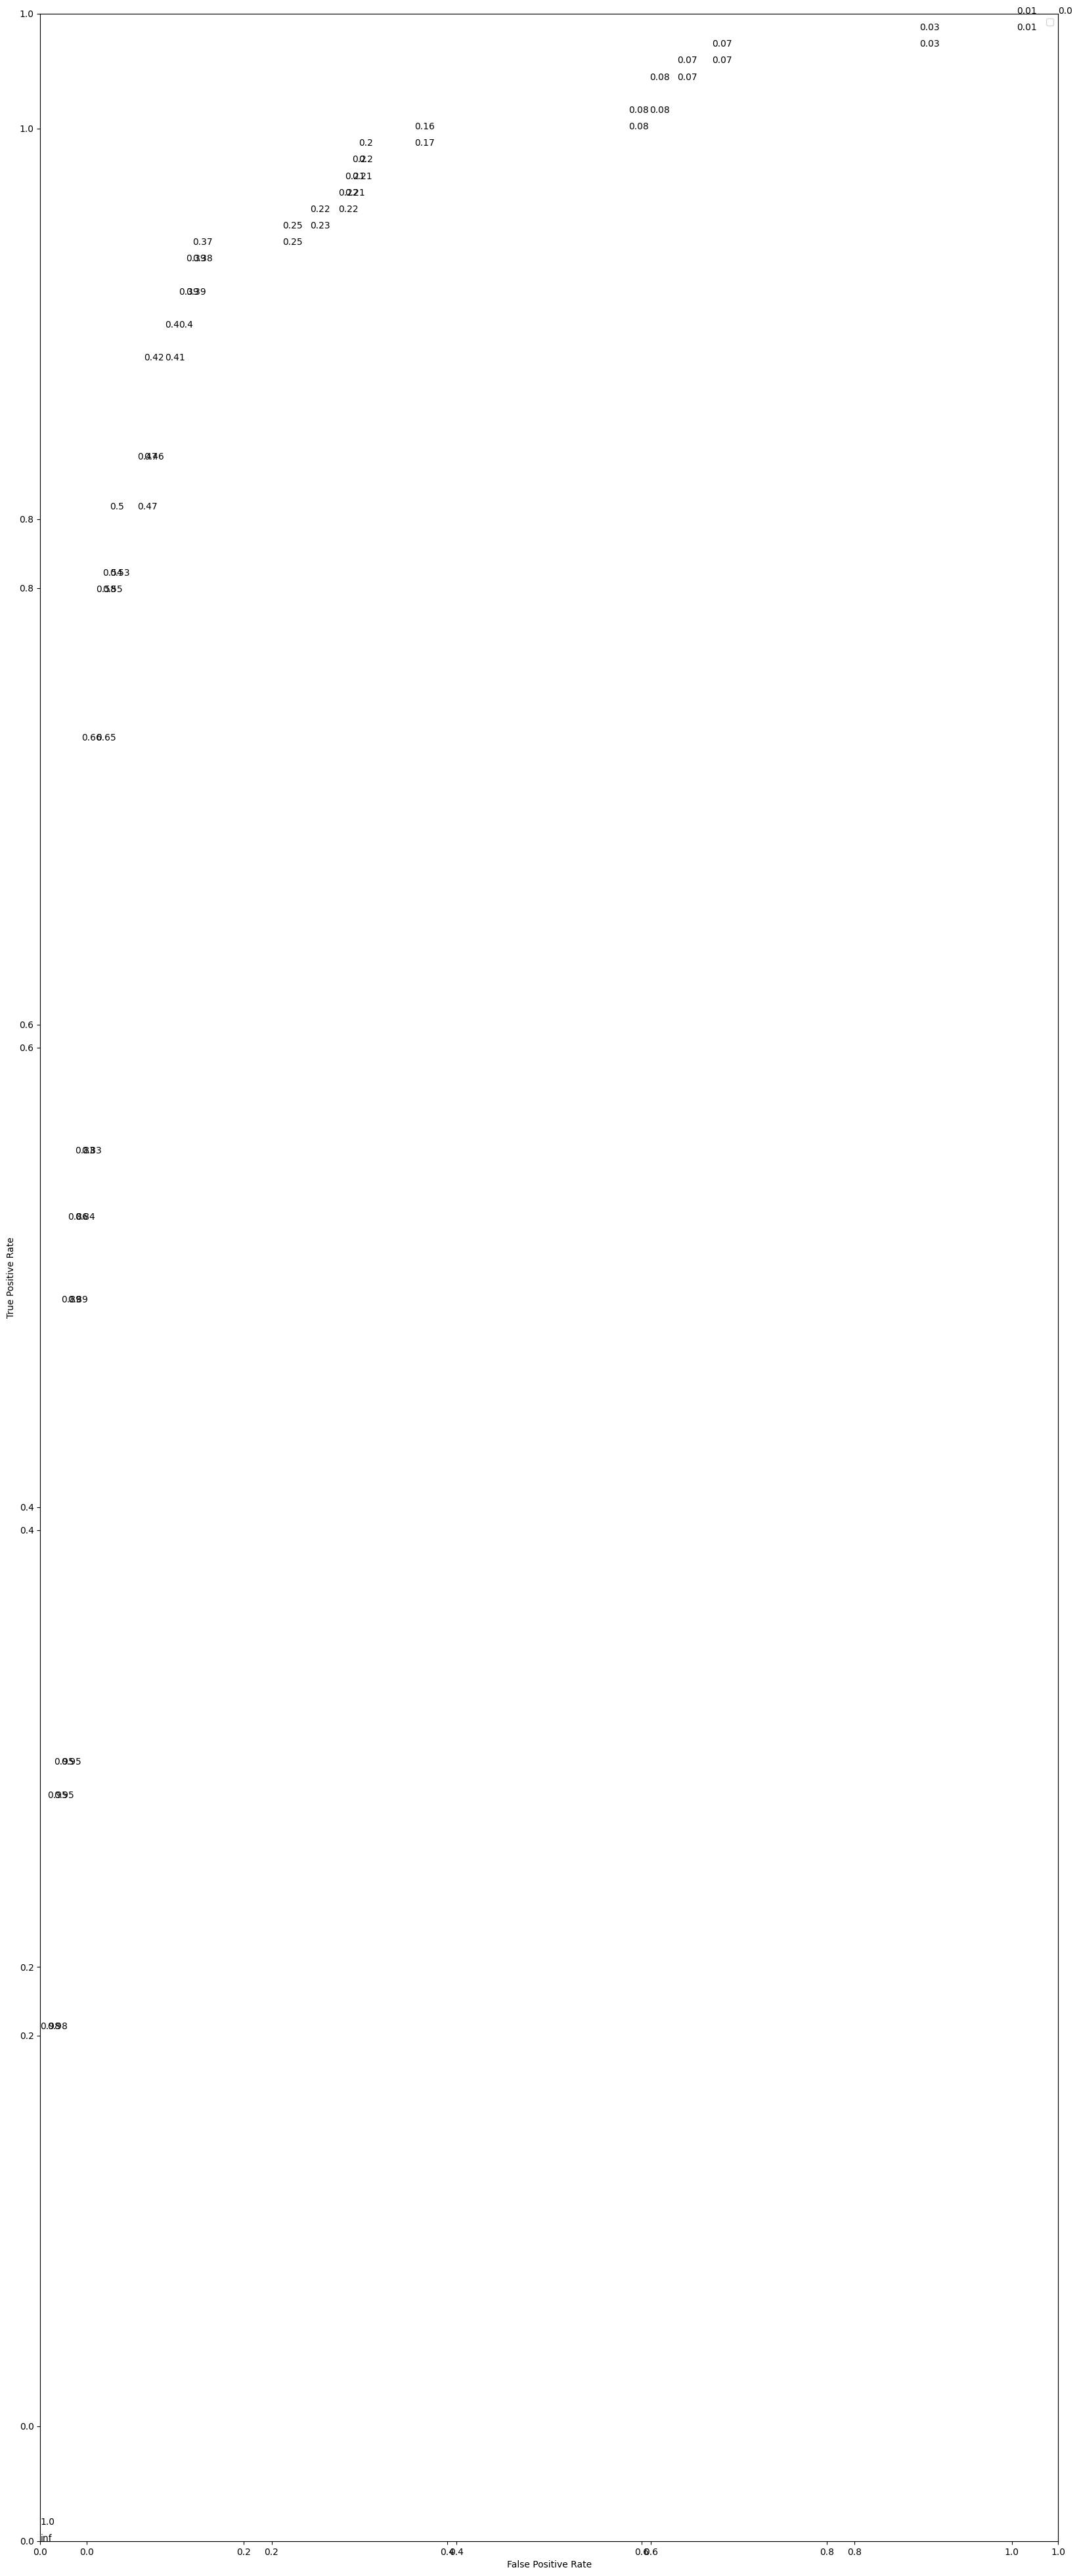

In [94]:
# plot the roc curve for the model
import numpy as np
fig = plt.figure(figsize=(20, 50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)

for xyz in zip(model_fpr, model_tpr, threshold):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0], xyz[1]))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()


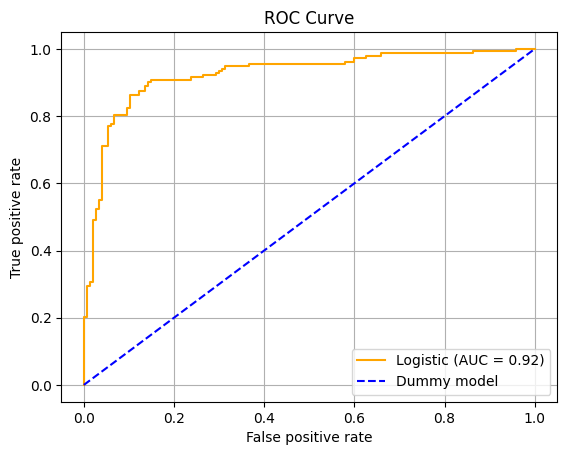

In [86]:
roc_auc = auc(model_fpr, model_tpr)

# Step 3: Plot
plt.figure()
plt.plot(model_fpr, model_tpr, color='orange', label=f'Logistic (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Dummy model')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

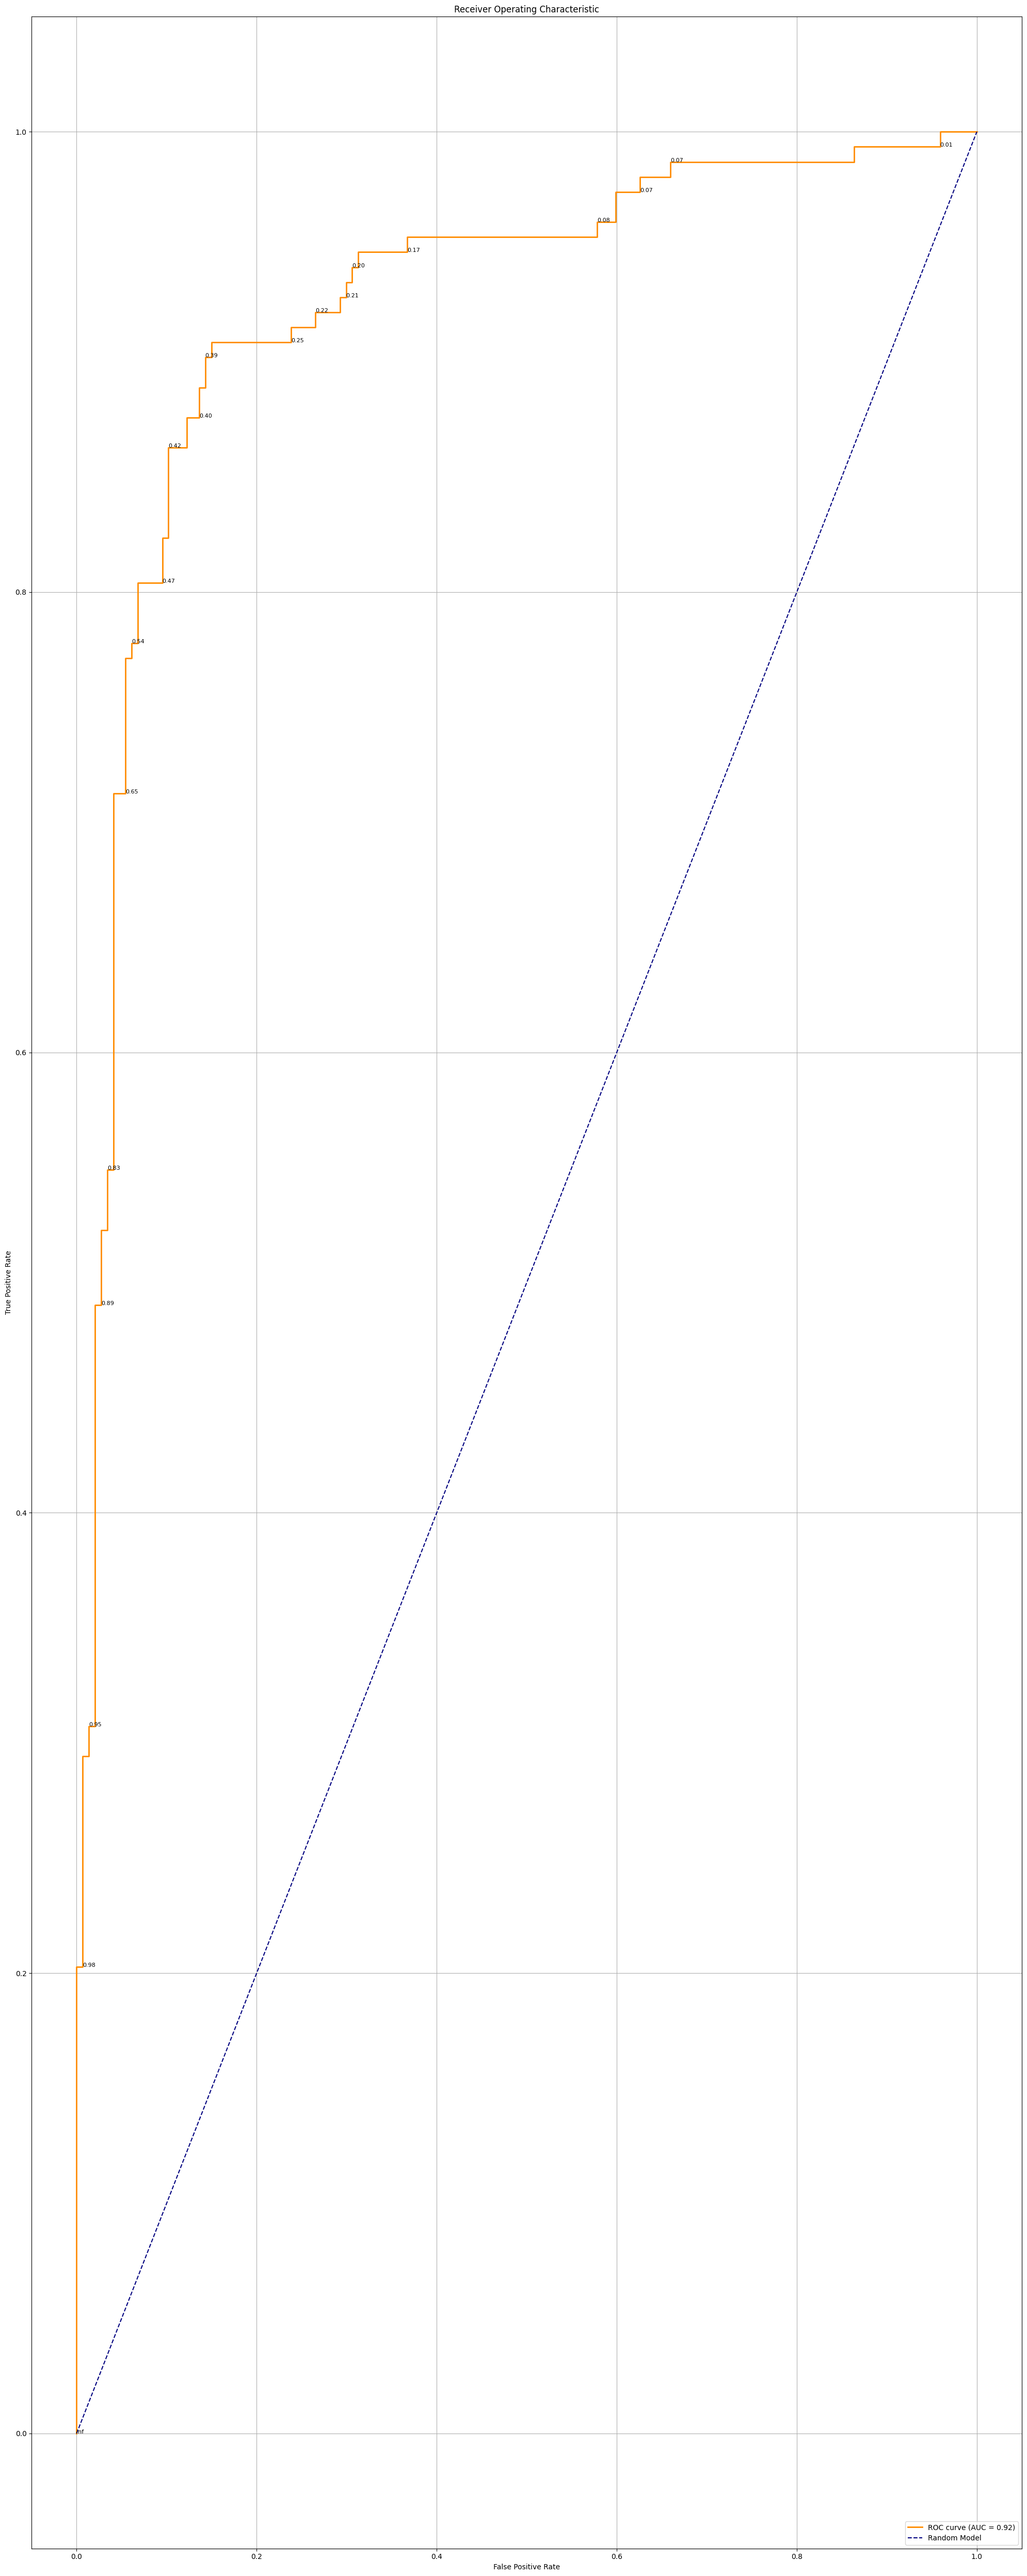

In [92]:
plt.figure(figsize=(20, 50))
plt.plot(model_fpr, model_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Model')

# Annotate threshold values
for i in range(0, len(threshold), max(1, len(threshold)//20)):
    plt.annotate(f"{threshold[i]:.2f}", (model_fpr[i], model_tpr[i]), fontsize=8)

# Axis labels and grid
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()